定义

如果一个样本在特征空间中的k个最相似的样本中大多数属于一个类别，则样本也属于这个类别

### 距离公式

KNN 算法中常用的距离公式包括：

@1. **欧氏距离（Euclidean Distance）**：

   给定两个点 $A(x_1, y_1, ..., z_1)$ 和 $B(x_2, y_2, ..., z_2)$，
   欧氏距离公式为：
   $$
   d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + ... + (z_2 - z_1)^2}
   $$

2. **曼哈顿距离（Manhattan Distance）**：

   曼哈顿距离公式为：
   $$
   d(A, B) = |x_2 - x_1| + |y_2 - y_1| + ... + |z_2 - z_1|
   $$

3. **闵可夫斯基距离（Minkowski Distance）**：

   闵可夫斯基距离公式为：
   $$
   d(A, B) = \left(\sum_{i=1}^n |x_{i2} - x_{i1}|^p\right)^{1/p}
   $$
   其中 $p$ 是一个参数，当 $p=2$ 时即为欧氏距离，当 $p=1$ 时即为曼哈顿距离。

这些距离公式用于衡量样本点之间的相似性，选择合适的距离公式对模型性能有重要影响。

### KNN 中的 k

在 KNN 算法中，`k` 表示用于分类或回归的最近邻样本的数量。

#### 选择 k 的影响：
- **较小的 k 值**：
  - 模型对噪声数据更敏感，可能导致过拟合。
  - 分类结果更依赖于局部数据分布。

- **较大的 k 值**：
  - 模型对噪声的鲁棒性更强，但可能导致欠拟合。
  - 分类结果更平滑，可能忽略局部模式。

#### 如何选择 k：
- 通常通过交叉验证选择最优的 k 值。
- 一般选择一个较小的奇数值（避免分类时出现平局）。

k 的选择对模型性能有重要影响，需要根据具体问题和数据分布进行调整。

knn算法流程

计算已知类别数据集中的点和当前点的距离

按距离递增排序

选取与当前点距离最小的k个点

统计前k个点出现概率

返回前k个点出现频率最高的类别作为当前点的预测分类

### KD 树

KD 树（K-Dimensional Tree）是一种用于多维空间中快速检索最近邻点的二叉树数据结构。

#### 特点：
- KD 树将数据划分为多个区域，每个区域包含较少的点，从而加速最近邻搜索。
- 每个节点对应一个数据点，并根据某个维度的值将数据划分为左右子树。

#### 构建过程：
1. 选择一个维度作为划分维度（通常是循环选择或选择方差最大的维度）。
2. 按照该维度对数据排序，选择中位数作为当前节点。
3. 将小于中位数的点放入左子树，大于中位数的点放入右子树。
4. 递归构建左右子树，直到所有点都被处理。

#### 最近邻搜索：
1. 从根节点开始，递归访问目标点所在的子树。
2. 在回溯过程中检查其他子树是否可能包含更近的点。
3. 更新最近邻点的距离，直到遍历完成。

#### 优点：
- 在低维空间中效率较高，适合处理静态数据集。

#### 缺点：
- 在高维空间中效率下降（维度灾难）。
- 对动态数据集支持较差（需要频繁重建）。

KD 树是 KNN 算法中常用的加速工具，尤其适用于低维数据的最近邻搜索。

In [45]:
from sklearn.neighbors import KNeighborsClassifier #knn算法API

### 代码解释

`from sklearn.neighbors import KNeighborsClassifier` 是从 Scikit-learn 库中导入 `KNeighborsClassifier` 类。

#### 主要功能：
- `KNeighborsClassifier` 是 K 最近邻（K-Nearest Neighbors, KNN）分类算法的实现。
- 它基于样本之间的距离来进行分类。

#### 常见参数：
- `n_neighbors`：指定最近邻的数量（即 k 值），默认值为 5。
- `weights`：指定权重类型，可以是 `'uniform'`（所有邻居权重相等）或 `'distance'`（根据距离加权）。
- `algorithm`：指定搜索算法，可以是 `'auto'`、`'ball_tree'`、`'kd_tree'` 或 `'brute'`。
- `metric`：指定距离度量方式，默认是欧氏距离（`'minkowski'`，`p=2`）。

#### 示例：
```python
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

该类广泛用于分类任务，尤其是小数据集或需要快速实现的场景。

In [46]:
x=[[0],[1],[2],[3]]
y=[0,0,1,1]
e=KNeighborsClassifier(n_neighbors=2)
e.fit(x,y)
e=e.predict([[1]])
print(e)

[0]


### 代码解释

以下代码演示了如何使用 `KNeighborsClassifier` 进行简单的分类任务：

```python
x = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
e = KNeighborsClassifier(n_neighbors=2)
e.fit(x, y)
e.predict([[1]])
```

- `x = [[0], [1], [2], [3]]`：定义了训练数据的特征，每个样本只有一个特征值。
- `y = [0, 0, 1, 1]`：定义了训练数据的标签，与 `x` 一一对应。
- `e = KNeighborsClassifier(n_neighbors=2)`：创建一个 KNN 分类器实例，设置 `n_neighbors=2`，即使用最近的 2 个邻居进行分类。
- `e.fit(x, y)`：使用训练数据 `x` 和标签 `y` 训练模型。
- `e.predict([[1]])`：对新样本 `[[1]]` 进行预测，返回预测的类别。

#### 运行结果：
- 模型会根据距离最近的 2 个邻居的类别进行投票，预测新样本的类别。
- 在此示例中，`[[1]]` 的最近邻是 `[[0], [1]]`，它们的类别均为 `0`，因此预测结果为 `0`。

该代码展示了 KNN 分类器的基本用法，适合用于理解 KNN 的核心思想和实现流程。

fetch大数据集

In [47]:
from sklearn.datasets import load_iris,fetch_20newsgroups#load小数据集
iris=load_iris()
print('鸢尾花数据集返回值:\n',iris)
print('鸢尾花数据集特征值:\n',iris['data'])
print('鸢尾花数据集目标值:\n',iris.target)
print('鸢尾花特征的名字:\n',iris.feature_names)
print('鸢尾花目标值的名字:\n',iris.target_names)
print('鸢尾花的描述:\n',iris.DESCR)



鸢尾花数据集返回值:
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4,

In [48]:
print('鸢尾花数据集特征值:\n',iris['data'])

鸢尾花数据集特征值:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


In [49]:
print('鸢尾花数据集目标值:\n',iris.target)

鸢尾花数据集目标值:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
print('鸢尾花数据集目标值:\n',iris.target)


鸢尾花数据集目标值:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [51]:
print('鸢尾花特征的名字:\n',iris.feature_names)


鸢尾花特征的名字:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [52]:
print('鸢尾花目标值的名字:\n',iris.target_names)


鸢尾花目标值的名字:
 ['setosa' 'versicolor' 'virginica']


In [53]:
print('鸢尾花的描述:\n',iris.DESCR)

鸢尾花的描述:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 cla

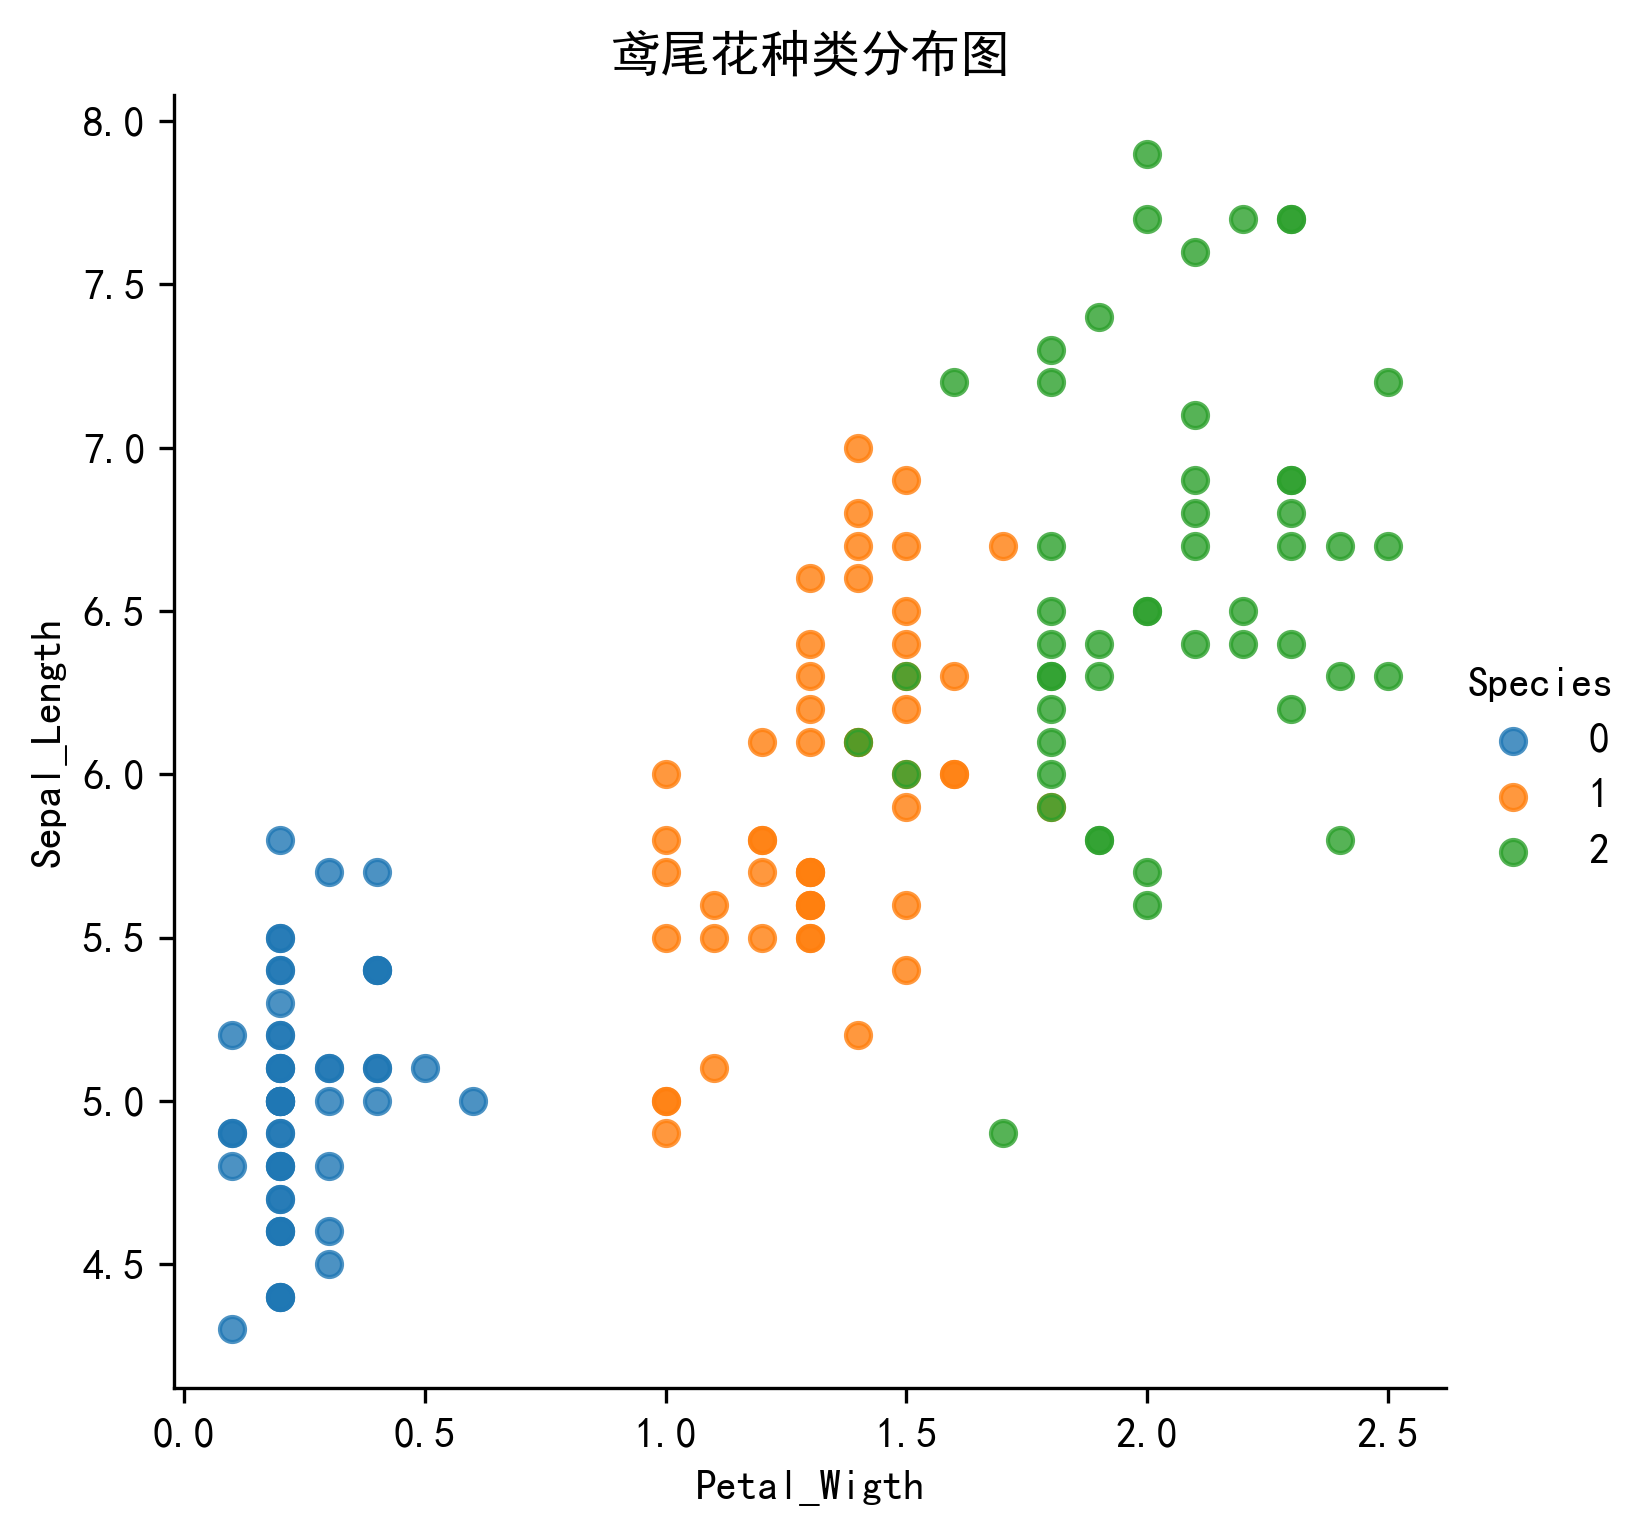

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
plt.rcParams['figure.dpi']=300
iris_d=pd.DataFrame(iris['data'],columns=['Sepal_Length','Sepal_Width','Petal_length','Petal_Wigth'])
iris_d['Species']=iris.target
def plot_iris(iris, col1,col2):
    sns.lmplot(x=col1,y=col2,data=iris,hue='Species',fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('鸢尾花种类分布图')
    plt.show()
plot_iris(iris_d,'Petal_Wigth','Sepal_Length')

这段代码的主要功能是通过可视化展示鸢尾花数据集中不同种类的分布情况。以下是代码的详细解释：

1. **创建数据框 `iris_d`**：
   - `iris_d=pd.DataFrame(iris['data'],columns=['Sepal_Length','Sepal_Width','Petal_length','Petal_Wigth'])`：
     - 使用 `pandas.DataFrame` 将鸢尾花数据集的特征值（`iris['data']`）转换为一个数据框。
     - 数据框的列名被指定为 `['Sepal_Length', 'Sepal_Width', 'Petal_length', 'Petal_Wigth']`，分别对应花萼长度、花萼宽度、花瓣长度和花瓣宽度。
   - `iris_d['Species']=iris.target`：
     - 将鸢尾花数据集的目标值（`iris.target`）添加为数据框的一个新列，命名为 `Species`，表示每个样本的类别。

2. **定义绘图函数 `plot_iris`**：
   - `def plot_iris(iris, col1, col2):`：
     - 定义一个函数 `plot_iris`，用于绘制鸢尾花数据的分布图。
     - 参数 `iris` 是数据框，`col1` 和 `col2` 分别是要绘制的两个特征列的名称。
   - `sns.lmplot(x=col1, y=col2, data=iris, hue='Species', fit_reg=False)`：
     - 使用 `seaborn.lmplot` 绘制散点图。
     - `x=col1` 和 `y=col2` 指定横轴和纵轴的特征。
     - `data=iris` 指定数据来源。
     - `hue='Species'` 根据 `Species` 列的值为不同类别的样本点着色。
     - `fit_reg=False` 禁用回归线的绘制。
   - `plt.xlabel(col1)` 和 `plt.ylabel(col2)`：
     - 分别设置横轴和纵轴的标签。
   - `plt.title('鸢尾花种类分布图')`：
     - 设置图表标题为“鸢尾花种类分布图”。
   - `plt.show()`：
     - 显示绘制的图表。

3. **调用函数 `plot_iris`**：
   - `plot_iris(iris_d, 'Petal_Wigth', 'Sepal_Length')`：
     - 调用 `plot_iris` 函数，绘制鸢尾花数据集中花瓣宽度（`Petal_Wigth`）和花萼长度（`Sepal_Length`）的分布图。
     - 不同类别的样本点会以不同颜色显示，便于观察它们在这两个特征上的分布情况。

通过这段代码，可以直观地了解鸢尾花数据集中不同种类的样本在特定特征上的分布规律，有助于分析特征与类别之间的关系。

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=22)
print('x_train:\n',x_train.shape)
x_train1,x_test1,y_train1,y_test1=train_test_split(iris.data,iris.target,test_size=0.2,random_state=6)
x_train2,x_test2,y_train2,y_test2=train_test_split(iris.data,iris.target,test_size=0.2,random_state=6)#random_state相同数据集相同

x_train:
 (120, 4)


这段代码的主要功能是将鸢尾花数据集分割为训练集和测试集，以便进行模型训练和评估。以下是代码的详细解释：

1. **`train_test_split` 函数**：
   - 该函数来自 `sklearn.model_selection` 模块，用于随机划分数据集。
   - 它将数据集分为训练集和测试集，训练集用于模型训练，测试集用于模型性能评估。

2. **参数说明**：
   - `iris.data`：鸢尾花数据集的特征值，包含每个样本的特征（如花萼长度、花萼宽度等）。
   - `iris.target`：鸢尾花数据集的目标值，表示每个样本的类别（如 Setosa、Versicolor、Virginica）。
   - `random_state=22`：设置随机种子，确保每次运行代码时数据分割结果一致。

3. **返回值**：
   - `x_train`：训练集的特征值。
   - `x_test`：测试集的特征值。
   - `y_train`：训练集的目标值。
   - `y_test`：测试集的目标值。

通过这段代码，数据集被分割为训练集和测试集，通常训练集占大部分（默认比例为 75%），测试集占小部分（默认比例为 25%）。这种分割方式有助于评估模型在未见数据上的泛化能力。

特征预处理

### 特征预处理

特征预处理是机器学习中非常重要的一步，主要用于将数据转换为适合模型训练的格式。

#### 常见方法：
- **标准化（Standardization）**：将特征值缩放到均值为 0，标准差为 1 的分布。
- **归一化（Normalization）**：将特征值缩放到 [0, 1] 或 [-1, 1] 的范围。
- **缺失值处理**：填充缺失值或删除缺失样本。

在本例中，我们将对鸢尾花数据集进行标准化处理。

In [56]:
from sklearn.preprocessing import StandardScaler

# 创建标准化器
scaler = StandardScaler()

# 对特征值进行标准化
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print('标准化后的训练集特征值:\n', x_train_scaled[:5])
print('标准化后的测试集特征值:\n', x_test_scaled[:5])

标准化后的训练集特征值:
 [[-1.17760298  0.08972731 -1.14053941 -1.22920387]
 [-0.44793504  0.76268211 -1.19656263 -0.96859528]
 [-0.32632372 -1.2561823   0.2040179   0.2041434 ]
 [-0.32632372 -1.03186403  0.42811078  0.0738391 ]
 [-0.08310107 -0.58322749  0.484134    0.2041434 ]]
标准化后的测试集特征值:
 [[-0.44793504  1.43563691 -1.19656263 -1.22920387]
 [ 0.76817819  0.31404557  0.93231977  1.50718637]
 [ 0.88978951 -0.58322749  0.54015722  0.46475199]
 [ 0.64656687 -1.2561823   0.76425011  0.98596918]
 [ 0.40334422 -0.35890923  0.59618044  0.3344477 ]]


#### 代码解释：
- `StandardScaler`：用于标准化特征值，使其均值为 0，标准差为 1。
- `fit_transform`：对训练集计算均值和标准差，并进行标准化。
- `transform`：使用训练集的均值和标准差对测试集进行标准化。

通过标准化处理，可以消除特征值量纲的影响，提高模型的训练效果。

### 数据归一化处理

数据归一化是特征预处理的一种方法，主要用于将特征值缩放到 [0, 1] 的范围。

#### 归一化的优点：
- 消除特征值量纲的影响。
- 提高模型的收敛速度。
- 适用于距离度量敏感的算法（如 KNN）。

在本例中，我们将对鸢尾花数据集进行归一化处理。

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 创建归一化器
scaler = MinMaxScaler()

# 对特征值进行归一化
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

print('归一化后的训练集特征值:\n', x_train_normalized[:5])
print('归一化后的测试集特征值:\n', x_test_normalized[:5])

#### 代码解释：
- `MinMaxScaler`：用于将特征值缩放到 [0, 1] 的范围。
- `fit_transform`：对训练集计算最小值和最大值，并进行归一化。
- `transform`：使用训练集的最小值和最大值对测试集进行归一化。

通过归一化处理，可以使特征值在相同的范围内，提高模型的训练效果。

KNeighborsClassifier(n_neighbors=3,algorithm=['auto','ball_tree,'kd_tree','brute']),

这段代码展示了 `KNeighborsClassifier` 的初始化，其中设置了两个重要参数：`n_neighbors` 和 `algorithm`。

1. **`n_neighbors=3`**：
   - 该参数指定了 KNN 算法中用于分类或回归的最近邻样本的数量，即 `k` 的值。
   - 在此设置为 3，表示每次预测时会考虑距离最近的 3 个样本点进行投票或加权计算。

2. **`algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']`**：
   - 该参数指定了用于最近邻搜索的算法类型。
   - 可选值包括：
     - `'auto'`：自动选择最合适的算法（默认值）。
     - `'ball_tree'`：使用 Ball Tree 数据结构进行搜索，适合中等维度的数据。
     - `'kd_tree'`：使用 KD Tree 数据结构进行搜索，适合低维度数据。
     - `'brute'`：使用暴力搜索，适合小数据集或高维数据。
   - 用户可以根据数据的特性选择合适的算法，以提高搜索效率。

通过设置这些参数，可以灵活调整 KNN 模型的行为，以适应不同的数据集和任务需求。

### KNN 算法的优缺点

#### 优点：
- 简单易懂，容易实现。
- 无需训练过程，适合小数据集。
- 对异常值不敏感，适合多分类问题。

#### 缺点：
- 计算复杂度高，预测时需要计算所有样本的距离。
- 对数据规模和维度敏感，容易受到“维度灾难”的影响。
- 需要选择合适的 k 值和距离度量方式。
- 对噪声数据敏感，可能影响分类结果。

### 交叉验证和网格搜索

#### 交叉验证：
- 交叉验证是一种评估模型性能的技术，通过将数据集划分为多个子集，轮流使用一个子集作为验证集，其余子集作为训练集。
- 常见的交叉验证方法包括：
  - **K 折交叉验证**：将数据集分为 K 个子集，依次使用每个子集作为验证集。
  - **留一法（LOOCV）**：每次使用一个样本作为验证集，其余样本作为训练集。

#### 网格搜索：
- 网格搜索是一种超参数优化方法，通过穷举搜索指定参数的所有可能组合，找到最优参数。
- 通常结合交叉验证使用，以确保参数选择的泛化能力。

以下代码展示了如何使用 Scikit-learn 实现交叉验证和网格搜索。

### 交叉验证和网格搜索的作用

#### 交叉验证的作用：
- 交叉验证是一种评估模型性能的技术，通过将数据集划分为多个子集，轮流使用一个子集作为验证集，其余子集作为训练集。
- 它的主要作用是评估模型的泛化能力，避免模型过拟合或欠拟合。
- 通过交叉验证，可以更稳定地评估模型在未见数据上的表现。

#### 网格搜索的作用：
- 网格搜索是一种超参数优化方法，通过穷举搜索指定参数的所有可能组合，找到最优参数。
- 它的主要作用是自动化地选择最佳的超参数组合，从而提高模型的性能。
- 通常结合交叉验证使用，以确保选择的参数具有良好的泛化能力。

交叉验证和网格搜索的结合可以有效地优化模型性能，同时评估模型的稳定性和泛化能力。

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# 定义模型
knn = KNeighborsClassifier()

# 定义参数网格
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 使用网格搜索和交叉验证
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 输出最佳参数和得分
print('最佳参数:', grid_search.best_params_)
print('最佳得分:', grid_search.best_score_)

# 使用交叉验证评估模型
cv_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
print('交叉验证得分:', cv_scores)
print('平均交叉验证得分:', cv_scores.mean())

这段代码的主要功能是通过网格搜索和交叉验证优化 KNN 模型的超参数。

1. **定义参数网格**：
   - `param_grid` 是一个字典，定义了需要优化的超参数及其可能的取值范围：
     - `'n_neighbors': [3, 5, 7]`：指定 KNN 中的邻居数量（k 值），分别尝试 3、5 和 7。
     - `'weights': ['uniform', 'distance']`：指定权重类型，`'uniform'` 表示所有邻居权重相等，`'distance'` 表示根据距离加权。
     - `'metric': ['euclidean', 'manhattan']`：指定距离度量方式，分别尝试欧氏距离和曼哈顿距离。

2. **网格搜索和交叉验证**：
   - `GridSearchCV` 是 Scikit-learn 提供的网格搜索工具，用于自动搜索超参数的最佳组合。
   - 参数说明：
     - `knn`：要优化的模型，这里是 KNN 分类器。
     - `param_grid`：定义的参数网格。
     - `cv=5`：指定 5 折交叉验证，即将训练集分为 5 个子集，每次使用 1 个子集作为验证集，其余 4 个子集作为训练集。
     - `scoring='accuracy'`：指定评估指标为准确率。

3. **模型训练**：
   - `grid_search.fit(x_train, y_train)`：对训练集进行网格搜索和交叉验证，找到最佳的超参数组合。

通过这段代码，程序会尝试参数网格中所有可能的组合，并使用交叉验证评估每种组合的性能，最终选择准确率最高的参数组合。这种方法可以有效提高模型的性能和泛化能力。

这段代码的主要功能是使用交叉验证评估 KNN 模型的性能，并输出每次验证的得分以及平均得分。

1. **`cross_val_score` 函数**：
   - 该函数来自 `sklearn.model_selection` 模块，用于执行交叉验证。
   - 参数说明：
     - `knn`：要评估的模型，这里是 KNN 分类器。
     - `x_train` 和 `y_train`：训练集的特征值和目标值。
     - `cv=5`：指定交叉验证的折数，这里是 5 折交叉验证，即将训练集分为 5 个子集，每次使用 1 个子集作为验证集，其余 4 个子集作为训练集。
     - `scoring='accuracy'`：指定评估指标为准确率。

2. **返回值**：
   - `cv_scores` 是一个包含 5 个元素的数组，每个元素表示一次交叉验证的得分（准确率）。

3. **打印结果**：
   - `print('交叉验证得分:', cv_scores)`：输出每次交叉验证的得分。
   - `print('平均交叉验证得分:', cv_scores.mean())`：计算并输出所有交叉验证得分的平均值，作为模型的整体性能指标。

通过这段代码，可以直观地了解模型在不同验证集上的表现，以及其平均性能。这种方法有助于评估模型的泛化能力，避免因单次划分数据集而导致的评估结果偏差。